In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [12]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [13]:
img = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')
img= cv2.medianBlur(img,35)

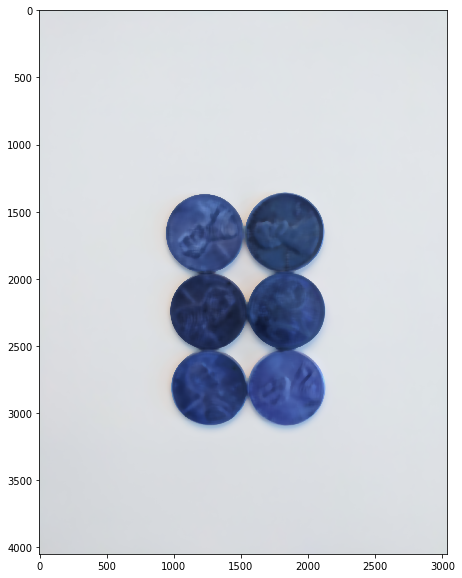

In [14]:
display(img)

In [17]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

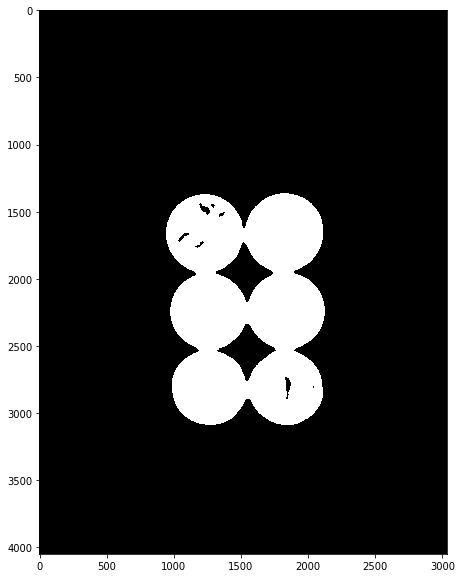

In [21]:
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
display(thresh)

In [22]:
## nice, but not good enough.
## we would like to have it as soild color no detailing.

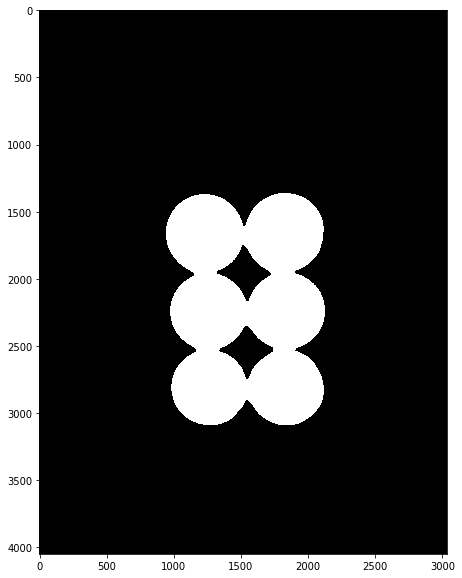

In [24]:
## Otsu method

ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

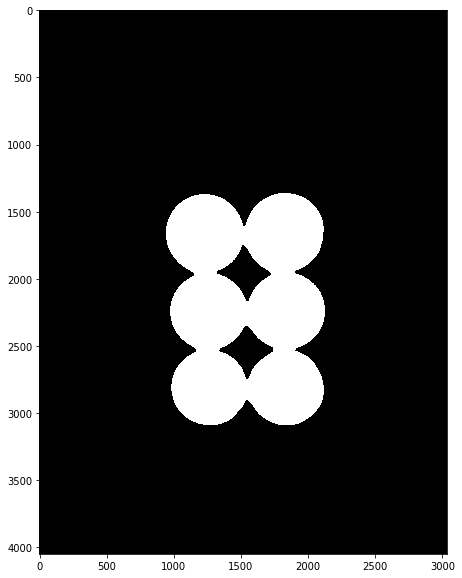

In [29]:
## noise removal
## not really needed on this image but it's a good practice 

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

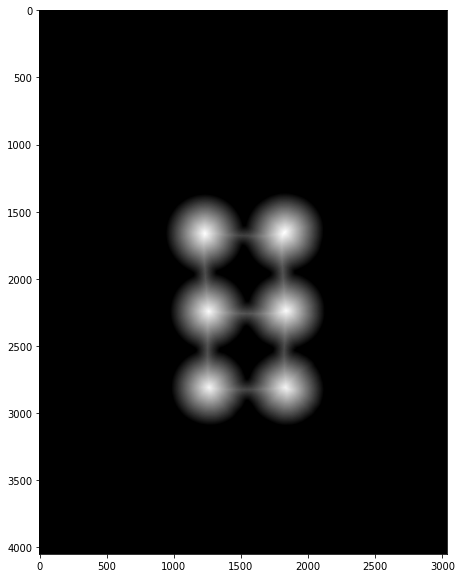

In [32]:
## distance transform

dist_trans = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_trans)

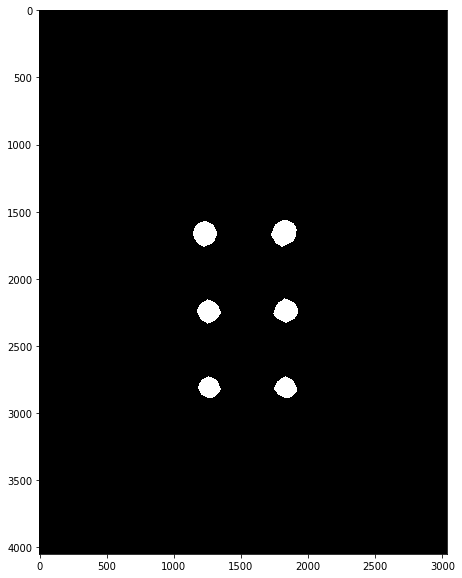

In [34]:
## another thershholding

ret, sure_fg = cv2.threshold(dist_trans, 0.7*dist_trans.max(),255,0)
display(sure_fg)

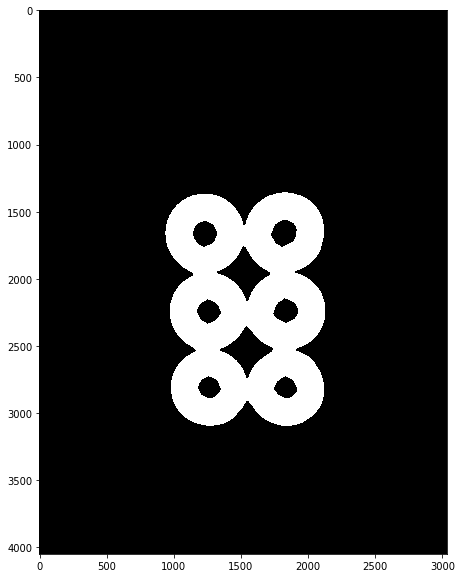

In [36]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

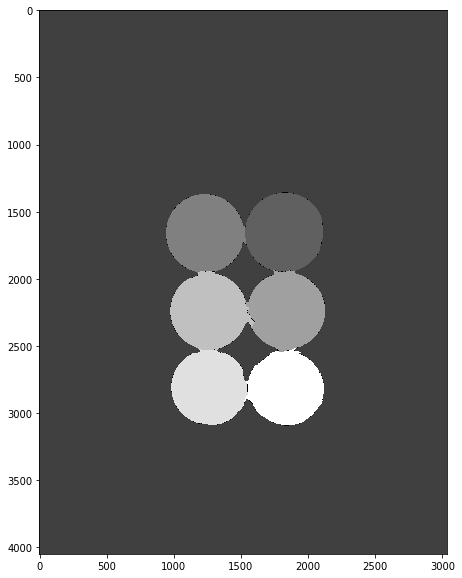

In [41]:
## creating label markers for watershed

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255]=0

## the above are the seeds

##applying watershed algorithem

markers = cv2.watershed(img,markers)
display(markers)

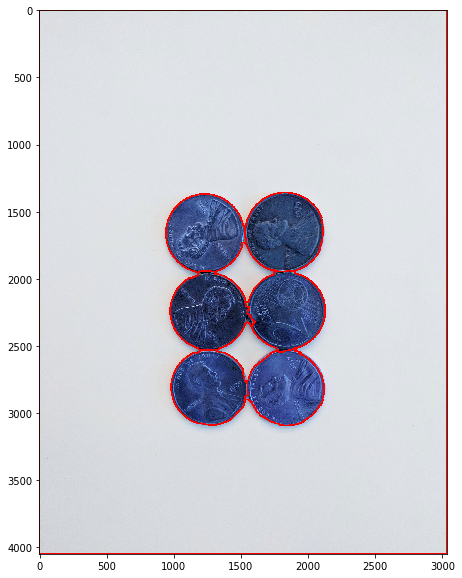

In [42]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)
        
display(sep_coins)